In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

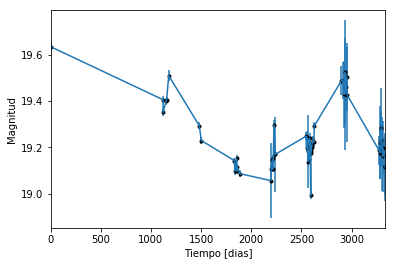

In [2]:
data = np.genfromtxt('LC_19608_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

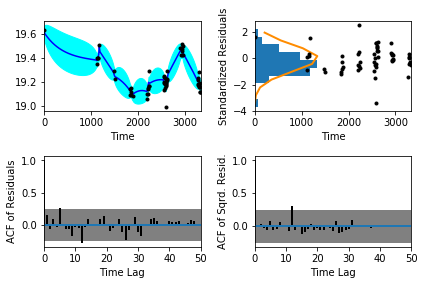

In [5]:
sample.assess_fit()

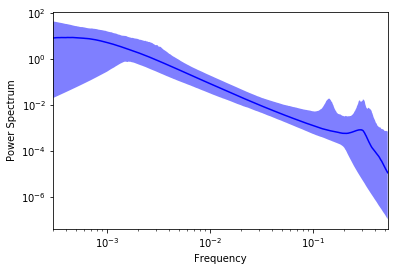

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.574738,'Medida del nivel de ruido')

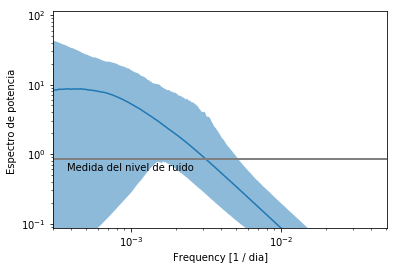

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

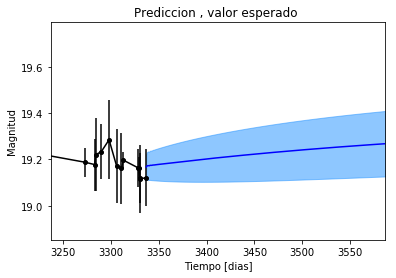

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

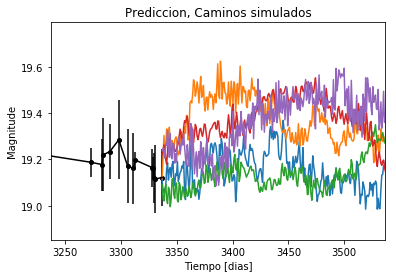

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


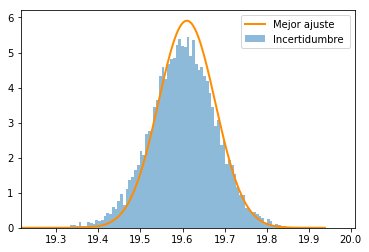

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

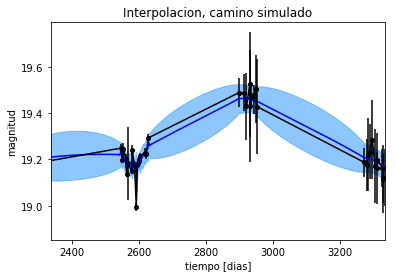

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

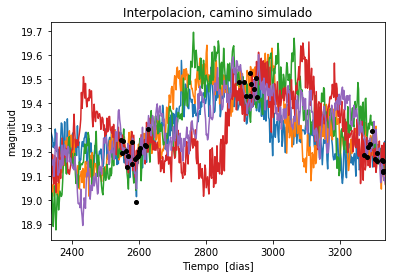

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 292.013423442
Median: 0.0167303058922
Standard deviation: 0.159473077311
68% credibility interval: [ 0.00856448  0.06093444]
95% credibility interval: [ 0.00470753  0.67440113]
99% credibility interval: [ 0.00301794  0.99460662]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 210.403553016
Median: 0.0154394410647
Standard deviation: 0.0682960150708
68% credibility interval: [ 0.0075461   0.04020833]
95% credibility interval: [ 0.00042946  0.25788151]
99% credibility interval: [  3.17695348e-04   4.46428493e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 229.531394895
Median: 0.0627153040439
Standard deviation: 0.32533672

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 192.445449245
Median: 0.308590015439
Standard deviation: 0.227821729487
68% credibility interval: [ 0.158777    0.69558337]
95% credibility interval: [ 0.          0.86084875]
99% credibility interval: [ 0.          0.92342881]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 192.445449245
Median: 0.308590015439
Standard deviation: 0.227821729487
68% credibility interval: [ 0.158777    0.69558337]
95% credibility interval: [ 0.          0.86084875]
99% credibility interval: [ 0.          0.92342881]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 336.780766486
Median: 0.0
Standard deviation: 0.000688328861053
68% cred

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 365.051796504
Median: 94.1453055537
Standard deviation: 2.21982309182
68% credibility interval: [ 91.76867898  96.08598247]
95% credibility interval: [ 88.79014334  97.29535677]
99% credibility interval: [ 86.45070309  97.92669796]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 338.382193454
Median: 0.950333190324
Standard deviation: 2.62591251957
68% credibility interval: [ 0.16764105  5.2635385 ]
95% credibility interval: [ 0.09089861  8.82562987]
99% credibility interval: [  0.06425494  11.88371328]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 128.177572579
Median: 4.53224818932
Standard deviation: 9.47535939908
68% credibility interval: [  2.88758552  20.106618  ]
95% credibility interval: [  0.82454503

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3476.15417358
Median: 12.2358228176
Standard deviation: 1.26759116551e+71
68% credibility interval: [  2.45537233e-29   9.34000060e+37]
95% credibility interval: [  1.69198839e-94   8.26111533e+70]
99% credibility interval: [  1.76738965e-104   7.38557927e+071]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1116.9892235
Median: 19.2910313422
Standard deviation: 0.074692585593
68% credibility interval: [ 19.23598583  19.367699  ]
95% credibility interval: [ 19.17308     19.47183593]
99% credibility interval: [ 19.10320893  19.54749593]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 192.445449245
Median: 0.308590015439
Standard deviation: 0.227821729487
68% credibility interval: [ 0.158777    0.69558337]
95% credibility interval: [ 0.          0.86084875]
99% credibility interval: [ 0.          0.92342881]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 192.445449245
Median: 0.308590015439
Standard deviation: 0.227821729487
68% credibility interval: [ 0.158777    0.69558337]
95% credibility interval: [ 0.          0.86084875]
99% credibility interval: [ 0.          0.92342881]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 336.780766486
Median: 0.0
Standard deviation: 0.000688328861053
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 365.051796504
Median: 94.1453055537
Standard deviation: 2.21982309182
68% credibility interval: [ 91.76867898  96.08598247]
95% credibility interval: [ 88.79014334  97.29535677]
99% credibility interval: [ 86.45070309  97.92669796]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 840.925430247
Median: 0.0337726169382
Standard deviation: 0.0187215297611
68% credibility interval: [ 0.02280361  0.05252087]
95% credibility interval: [ 0.01572334  0.08865749]
99% credibility interval: [ 0.01265329  0.12281068]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1261.52190248
Median: 0.804231070608
Standard deviation: 0.148179966383
68% credibility interval: [ 0.67595069  0.96153365]
95% credibility interval: [ 0.57596308  1.15110073]
99% credibility interval: [ 0.53482494  1.29467473]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 160.490847167
Median: 0.015304464336
Standard deviation: 0.498098457074
68% credibility interval: [  5.77736808e-40   3.14375861e-01]
95% credibility interval: [  2.34273339e-72   1.98479688e+00]
99% credibility interval: [  2.08150280e-73   2.96075362e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 292.013423442
Median: (-0.105119612166-1.8253033989j)
Standard deviation: 1.74729500928
68% credibility interval: [-0.38286236-2.09161321j -0.05381222-1.08005429j]
95% credibility interval: [-4.23738725+0.j        -0.02957827-4.5254001j]
99% credibility interval: [-6.24929769+0.j         -0.01896229-5.34495032j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 210.403553016
Median: (-0.0970088692487+4.26402107936j)
Standard deviation: 1.49438249714
68% credibility interval: [-0.25263637+4.10470296j -0.04741357+4.56019394j]
95% credibility interval: [-1.62031733+1.24591774j -0.00269836+0.j        ]
99% credibility interval: [ -2.80499295e+00+1.40893468j  -1.99613874e-03+0.j        ]
Posterior summary for parameter ar_roo